In [25]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('/Users/arya/Desktop/project_1/data/processed/magic04.data')
data.head()

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [27]:
data.columns

Index(['28.7967', '16.0021', '2.6449', '0.3918', '0.1982', '27.7004', '22.011',
       '-8.2027', '40.092', '81.8828', 'g'],
      dtype='object')

In [28]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
data = pd.read_csv('/Users/arya/Desktop/project_1/data/processed/magic04.data', names = cols)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [29]:
data['class'] = data['class'].replace('g', 1)
data['class'] = data['class'].replace('h', 0)
data.head()

/var/folders/m2/rw7ggw51615fs72dvds66vgw0000gn/T/ipykernel_32494/2558612147.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class'] = data['class'].replace('h', 0)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


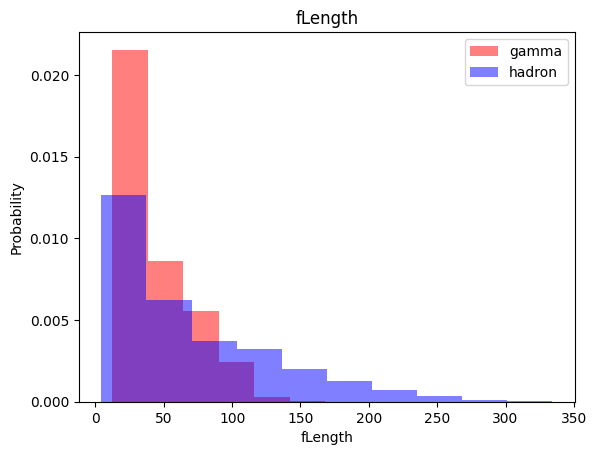

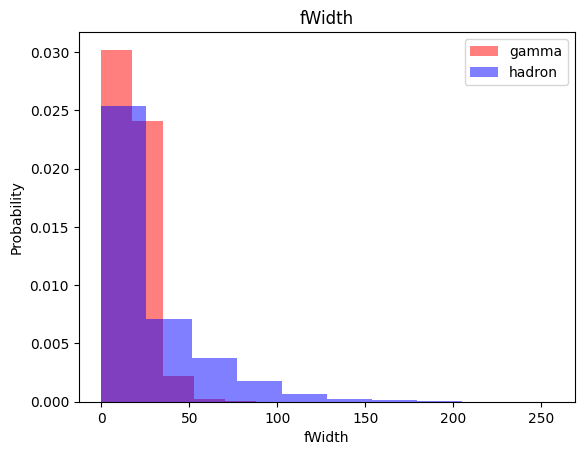

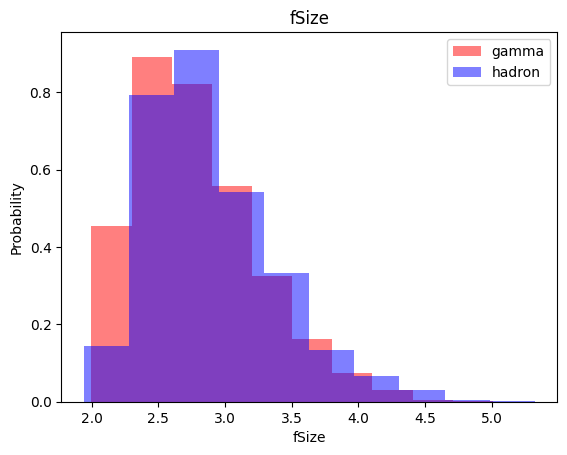

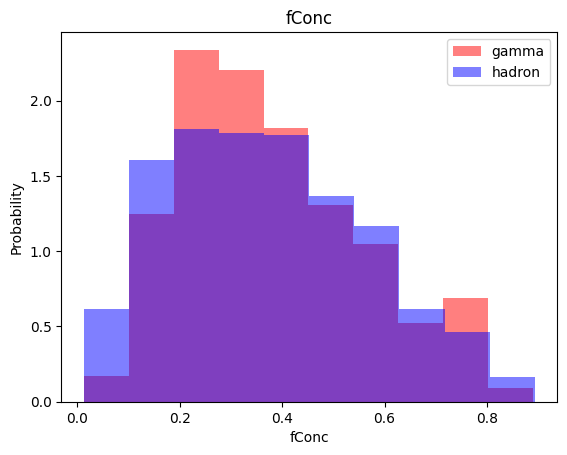

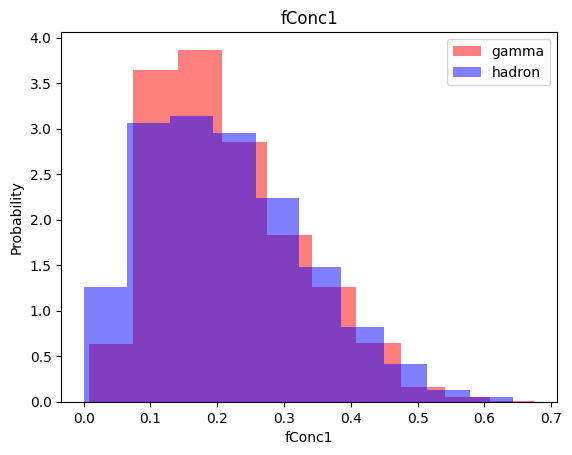

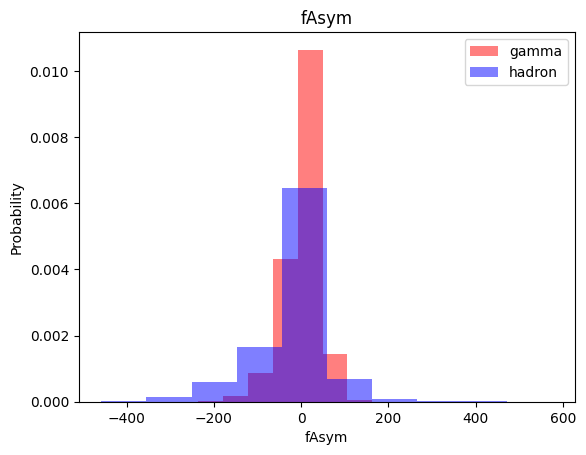

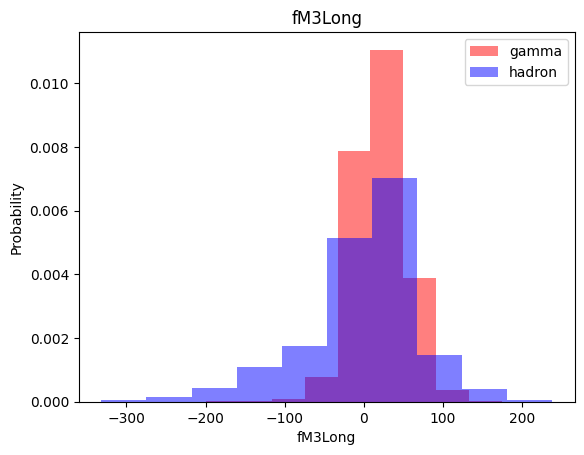

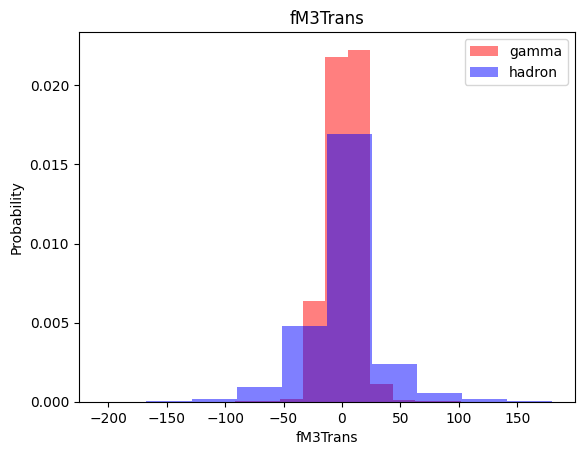

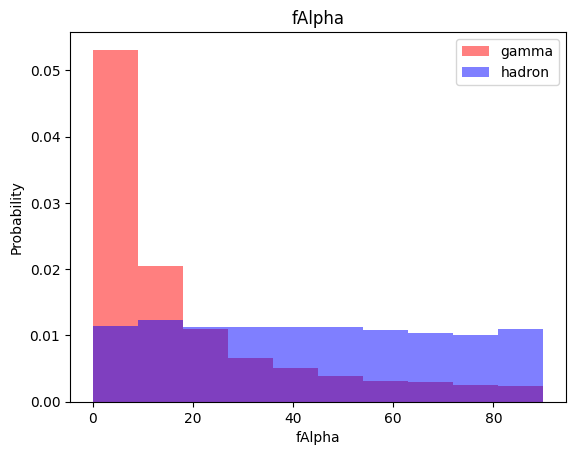

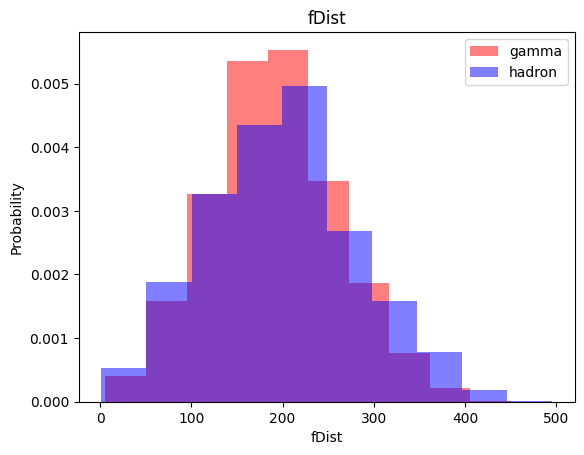

In [30]:
import matplotlib.pyplot as plt

for label in cols[:-1]:
    plt.hist(data[data['class']==1][label], label = 'gamma', alpha =0.5, color = 'red', density = True)
    plt.hist(data[data['class']==0][label], label = 'hadron', alpha =0.5, color = 'blue', density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [32]:
train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

/Users/arya/Desktop/project_1/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [34]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [38]:
def dataframe_scaler(dataframe, oversample= False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample==True:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)

    data = np.hstack((x, np.reshape(y, (-1,1))))

    return data, x,y

In [39]:
train, x_train, y_train = dataframe_scaler(train, oversample=True)
valid, x_valid, y_valid = dataframe_scaler(valid, oversample=False)
test, x_test, y_test = dataframe_scaler(test, oversample=False)
print(len(x_train), len(y_train))

14830 14830


K Nearest Neighbours

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model= KNeighborsClassifier(n_neighbors = 9)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(y_pred)
print(y_test)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1350
           1       0.85      0.88      0.86      2454

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804

[1 0 1 ... 0 0 1]
[1 0 1 ... 0 0 1]


Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
y_pred  = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1350
           1       0.74      0.90      0.81      2454

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



Logisitic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model = lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1350
           1       0.84      0.81      0.83      2454

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))